In [12]:
import sys
import os
import talib 

# Go two levels up: from 'notebooks/task1/' to the project root
sys.path.append(os.path.abspath(os.path.join('..', '..')))

In [13]:
import yfinance as yf


# Download DAL data from 2018-01-01 to 2025-04-30
df_DAL = yf.download(
    "DAL", 
    "2009-09-10", 
    end="2020-06-10"   # end date is exclusive, so use 2025-05-01 for up to April 30
)

# Reset index to make 'Date' a column
df_DAL.reset_index(inplace=True)



[*********************100%***********************]  1 of 1 completed


In [14]:



# Save the DataFrame as a CSV file in the correct folder
df_DAL.to_csv(r"C:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\data\yfinance_data\DAL_historical_data.csv", index=False)


In [15]:
print("Null values count per column:")
print(df_DAL.isnull().sum())


Null values count per column:
Price   Ticker
Date              0
Close   DAL       0
High    DAL       0
Low     DAL       0
Open    DAL       0
Volume  DAL       0
dtype: int64


In [16]:
df_DAL.describe()

Price,Date,Close,High,Low,Open,Volume
Ticker,,DAL,DAL,DAL,DAL,DAL
count,2705,2705.000000,2705.000000,2705.000000,2705.000000,2.705000e+03
mean,2015-01-23 13:16:55.452865024,30.365056,30.788292,29.955965,30.387429,1.191641e+07
min,2009-09-10 00:00:00,5.758165,5.993013,5.575504,5.601599,1.076000e+06
25%,2012-05-16 00:00:00,10.785684,10.994439,10.550837,10.794380,7.055600e+06
50%,2015-01-26 00:00:00,34.267059,34.786377,33.761165,34.366416,9.603300e+06
75%,2017-09-29 00:00:00,45.530750,46.053523,44.938132,45.594600,1.314220e+07
max,2020-06-09 00:00:00,60.971832,61.242131,60.218856,60.649504,2.063723e+08
std,NaN,17.378535,17.532840,17.231494,17.391496,1.056281e+07


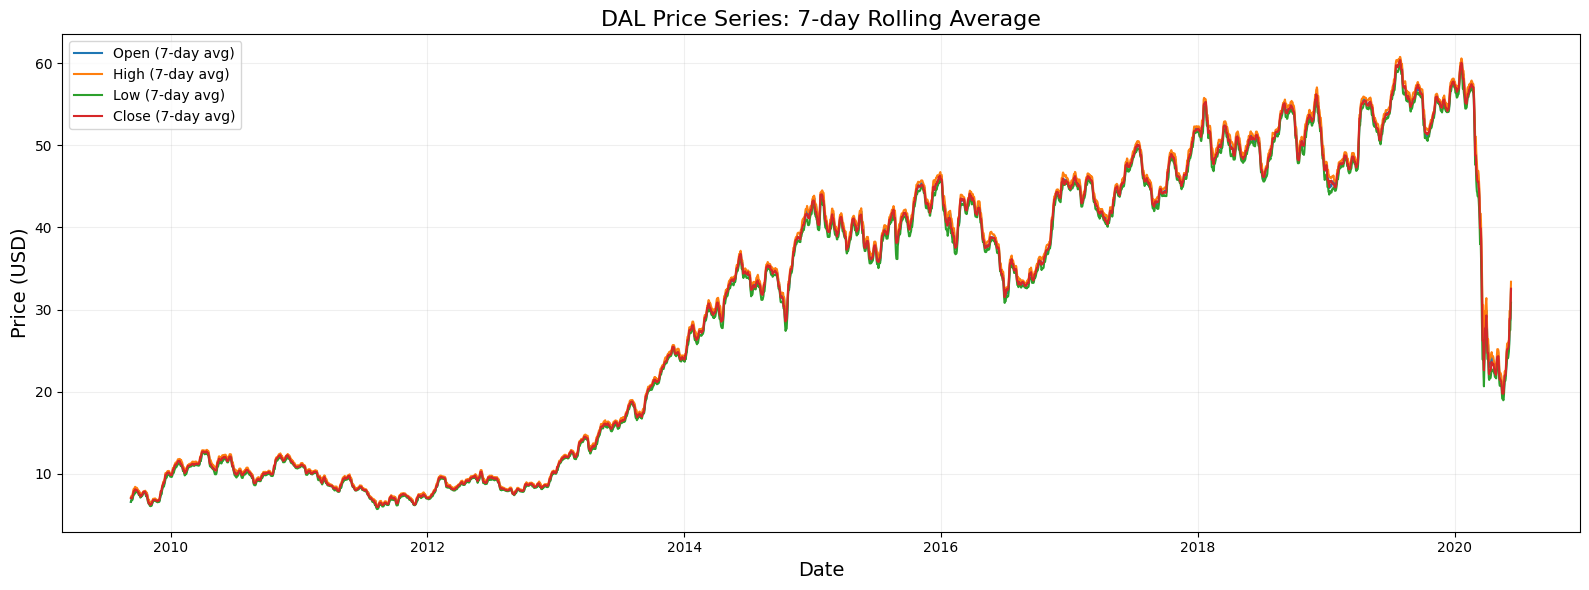

In [17]:
import matplotlib.pyplot as plt
from src.visualization import get_rolling_series

plt.figure(figsize=(16, 6))

for col in ['Open', 'High', 'Low', 'Close']:
    rolling_series = get_rolling_series(df_DAL, value_col=col, window=7)
    plt.plot(
        rolling_series.index, 
        rolling_series.values, 
        label=f"{col.title()} (7-day avg)"
    )

plt.title("DAL Price Series: 7-day Rolling Average", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


In [18]:
print(df_DAL.columns)
print(df_DAL.columns[df_DAL.columns.duplicated()])
print(type(df_DAL['Close']))  # Should be Series, not DataFrame!



MultiIndex([(  'Date',    ''),
            ( 'Close', 'DAL'),
            (  'High', 'DAL'),
            (   'Low', 'DAL'),
            (  'Open', 'DAL'),
            ('Volume', 'DAL')],
           names=['Price', 'Ticker'])
MultiIndex([], names=['Price', 'Ticker'])
<class 'pandas.core.frame.DataFrame'>


In [19]:
df_DAL.columns = ['_'.join([str(c) for c in col if c]) for col in df_DAL.columns.values]
# Now 'Close_DAL', 'High_DAL', ...


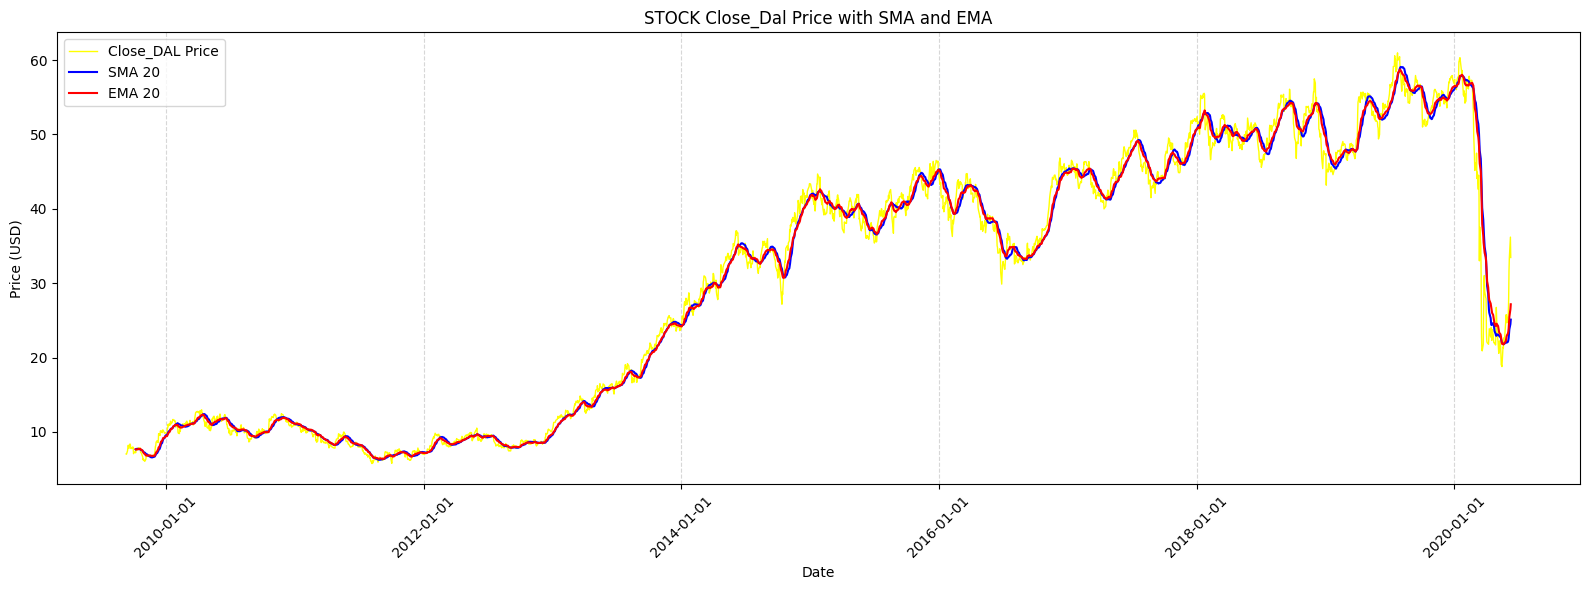

In [20]:
from src.plot_ma import plot_ma
plot_ma(df_DAL, 'Close_DAL')

##  DAL (Delta Air Lines) Close Price with SMA and EMA — Analysis

This chart tracks DAL’s (Delta Air Lines) closing price in yellow, with a **20-period Simple Moving Average (SMA, blue)** and **20-period Exponential Moving Average (EMA, red)**, spanning 2009–2020.



###  What Do These Lines Mean?
- **Close_DAL Price (Yellow):**
  - Shows daily closing prices—highlighting volatility and all price spikes/dips.
- **SMA 20 (Blue):**
  - Smooths out daily noise, reflecting DAL’s general price trend over 20 days.
  - Responds slowly to new price shocks.
- **EMA 20 (Red):**
 Also averages the last 20 days, but reacts faster to recent changes, giving more weight to recent prices.


###  How to Interpret This Chart

#### 1. **Trend Tracking**
- **2012–2017:** Strong, steady uptrend—price mostly above both SMA and EMA.
- **2017–2019:** Still upward, but with more swings. Moving averages follow price closely.
- **2020:** Dramatic plunge (COVID-19 impact on airlines)—moving averages drop, lag slightly behind the sharp price fall.

#### 2. **SMA vs EMA Behavior**
- **During uptrends:** EMA (red) is often closer to the yellow price line—reacts faster to surges.
- **During reversals or sharp drops:** EMA turns faster than SMA, signaling the trend change more quickly.
- **Both lines** act as dynamic support/resistance in normal conditions; price often bounces off or crosses these lines.

#### 3. **Major Event Impact**
- The sudden, deep dive in early 2020 stands out—the SMA and EMA both lag the crash, but EMA “catches up” more quickly.

#### 4. **Trading Signals**
- **Bullish cross:** When price crosses above both SMA and EMA, it may signal the start of a new uptrend.
- **Bearish cross:** When price drops below both, it can warn of further declines (as seen in the 2020 plunge).


###  Key Takeaways

- **SMA:** Smoother, better for identifying long-term trend direction.
- **EMA:** More responsive, useful for catching short-term moves or early warnings.
- **Big drops (like in 2020):** Show why traders need to combine moving averages with other signals—news, fundamentals, volume—to avoid “lag” during crashes.



> **Summary:**  
> Moving averages help you see through daily price noise. For DAL, both SMA and EMA clearly tracked years of growth, followed by an epic pandemic crash—showing how technicals and real-world events work together in the market.



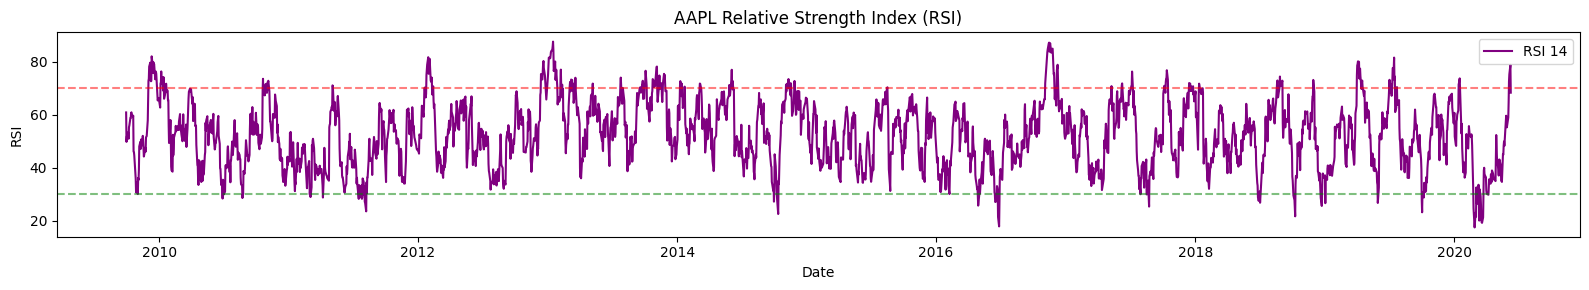

In [23]:
from src.plot_rsi import plot_rsi

# For Apple, using Close price:
plot_rsi(df_DAL, price_col='Close', ticker_name='AAPL')




## AAPL Relative Strength Index (RSI) Analysis

This chart displays the 14-period RSI for Apple (AAPL) from 2009 to 2020. RSI is a momentum oscillator ranging from 0 to 100, used to assess the speed and change of price movements.

Key Levels  
- The 70 level (red dashed line) is the overbought threshold. When RSI is above 70, AAPL is considered overbought, which may indicate a short-term correction or pullback is possible.  
- The 30 level (green dashed line) is the oversold threshold. When RSI is below 30, AAPL is considered oversold, which may indicate a possible rebound or upward reversal.

Interpretation  
- The RSI line frequently oscillates between 30 and 70, reflecting the stock’s dynamic price action and periods of shifting momentum.  
- Spikes above 70 indicate periods of strong buying pressure and possible overheating. Not every overbought signal is immediately followed by a drop; sometimes the price continues to rise.  
- Drops below 30 highlight moments of sharp selling or negative sentiment. These can signal potential buy-the-dip opportunities but should be confirmed with additional analysis.  
- The RSI regularly returns to the middle zone (around 50), suggesting that extreme conditions are often temporary and that price momentum tends to revert to the mean.

Takeaways  
- Short-term traders may use RSI extremes to anticipate reversals or trend exhaustion, but confirmation from other indicators is recommended before making decisions.  
- Long-term investors can monitor oversold levels as potential accumulation zones during market corrections.  
- RSI is best used in combination with other technical tools and an understanding of market context for more reliable signals.


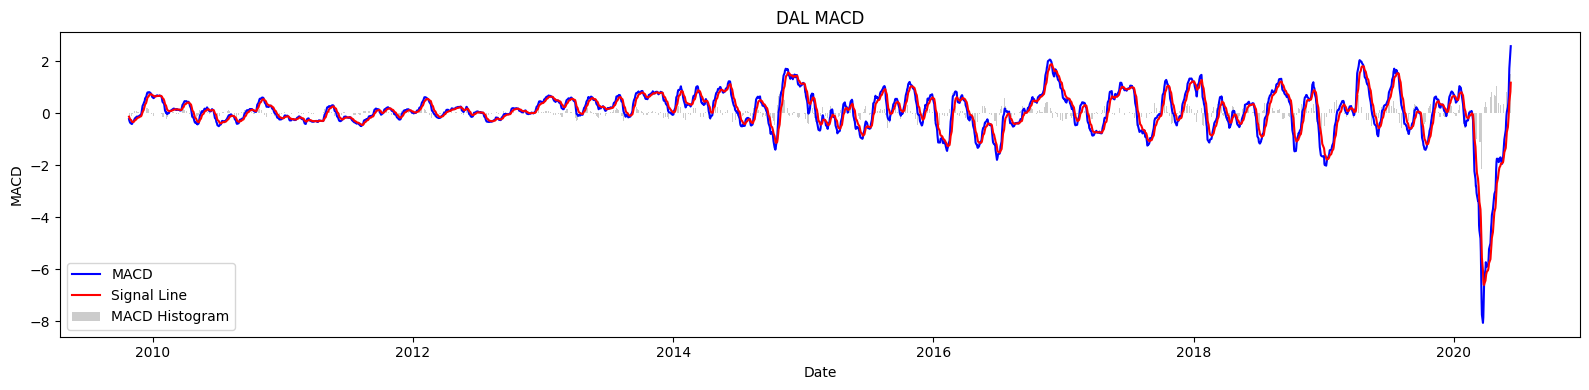

In [22]:
from src.plot_macd import plot_macd

# For Apple with Close price
plot_macd(df_DAL, price_col='Close_DAL', ticker_name='DAL')